# Data preprocessing steps

In [48]:
import numpy as np
import math

test_data = np.loadtxt('/home/sibi/acad/mach_learn_with_networks/assignment/2_lm_opt/bclass/bclass/bclass-test',delimiter='\t')
train_data = np.loadtxt('/home/sibi/acad/mach_learn_with_networks/assignment/2_lm_opt/bclass/bclass/bclass-train',delimiter='\t')
train_data = np.delete(train_data,2,1)
test_data = np.delete(test_data,2,1)

X_train = train_data[:,1:]
y_train = train_data[:,0]
X_train.shape
y_train.shape

X_test = test_data[:,1:]
y_test = test_data[:,0]

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear SVM

In [46]:
C_vals = [0.25, 0.5, 1, 2, 4]
train_acc = []
test_acc = []
sup_vec = []
for C in C_vals:
    clf = SVC(C= C, kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    tr_acc = accuracy_score(y_train,y_pred)
    train_acc.append(tr_acc)
    
    y_pred = clf.predict(X_test)
    te_acc = accuracy_score(y_test,y_pred)
    test_acc.append(te_acc)
    sup_vec.append(clf.n_support_ )

In [47]:
print train_acc
print test_acc
print sup_vec

[0.93000000000000005, 0.94999999999999996, 0.94999999999999996, 0.96499999999999997, 0.96499999999999997]
[0.84210526315789469, 0.84210526315789469, 0.84210526315789469, 0.84210526315789469, 0.82894736842105265]
[array([42, 36], dtype=int32), array([36, 34], dtype=int32), array([34, 30], dtype=int32), array([32, 23], dtype=int32), array([29, 20], dtype=int32)]


In [64]:
total_sup_vec = []
for i in xrange(5):
    total_sup_vec.append(sup_vec[i][0] + sup_vec[i][1])
print total_sup_vec

[78, 70, 64, 55, 49]


In [147]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

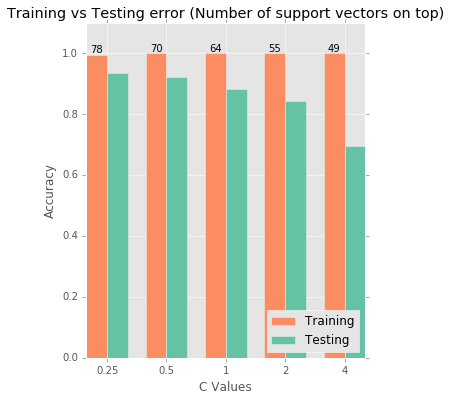

In [170]:
fig = plt.figure(figsize=(5, 6))
plt.style.use('ggplot')

ind = np.arange(5)
width = 0.35
ind = np.arange(5)

ax1 = fig.add_subplot(1,1,1)
rects1 = ax1.bar(ind, train_acc, width, color='#fc8d62',label='Training')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("C Values")
ax1.set_xticks(ind+width)
ax1.set_xticklabels(C_vals)
ax1.set_ylim(0,1.1)
rects2 = ax1.bar(ind+width, test_acc, width, color='#66c2a5',label='Testing')
ax1.set_title("Training vs Testing error (Number of support vectors on top)")
# ax1.hist(taus,train_accs,label="Training Accuracy",)
# ax1.bar( test_accs,label="Training Accuracy")
# ax1.set_ylabel("Accuracy")
# ax1.set_xlabel("Tau")
# ax2.set_xticklabels(('0','0.01', '0.05', '0.1', '1', '5'))

rects = ax1.patches
labels = total_sup_vec
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

ax1.legend(loc = 4)

plt.show()

In [100]:
#  class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', 
#                        coef0=0.0, shrinking=True, probability=False, tol=0.001, 
#                        cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
#                        decision_function_shape=None, random_state=None)[source]

C_vals = [0.25, 0.5, 1, 2, 4]
Gamma_vals = [0.25, 0.5, 1, 2, 4]
train_acc = []
test_acc = []
sup_vec = []
c_train_acc = []
c_test_acc = []
c_sup_vec = []
for C in C_vals:
    train_acc = []
    test_acc = []
    sup_vec = []
    for G in Gamma_vals:
        clf = SVC(C=C,kernel='rbf', gamma = G)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_train)
        tr_acc = accuracy_score(y_train,y_pred)
        train_acc.append(tr_acc)

        y_pred = clf.predict(X_test)
        te_acc = accuracy_score(y_test,y_pred)
        test_acc.append(te_acc)
        sup_vec.append(clf.n_support_[0] + (clf.n_support_[1] ))
    c_train_acc.append(train_acc)
    c_test_acc.append(test_acc)
    c_sup_vec.append(sup_vec)

In [108]:
c_train_acc

[[0.96499999999999997, 0.97499999999999998, 0.66500000000000004, 0.63, 0.63],
 [0.98499999999999999, 0.98499999999999999, 0.995, 1.0, 0.65500000000000003],
 [0.98999999999999999, 0.995, 0.995, 1.0, 1.0],
 [0.995, 0.995, 1.0, 1.0, 1.0],
 [0.995, 1.0, 1.0, 1.0, 1.0]]

In [150]:
def plot_c_gamma_graph(ax1,row,i,j,train_accs, test_accs,sup_vec, C):
    ax1 = fig.add_subplot(gs[row,i:j])

    rects1 = ax1.bar(ind, train_accs, width, color='#b2df8a',label='Training')
    
    ax1.set_ylabel("Accuracy")
    ax1.set_xlabel("Gamma Values")
    ax1.set_xticks(ind+width)
    ax1.set_xticklabels(Gamma_vals)

    rects2 = ax1.bar(ind+width, test_accs, width, color='#1f78b4',label='Testing')
    title = "Training vs Testing Error for C = " + str(C)
    ax1.set_title(title)
    ax1.set_ylim(0,1.1)

    rects = ax1.patches
    labels = sup_vec
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

    ax1.legend(loc = 4)

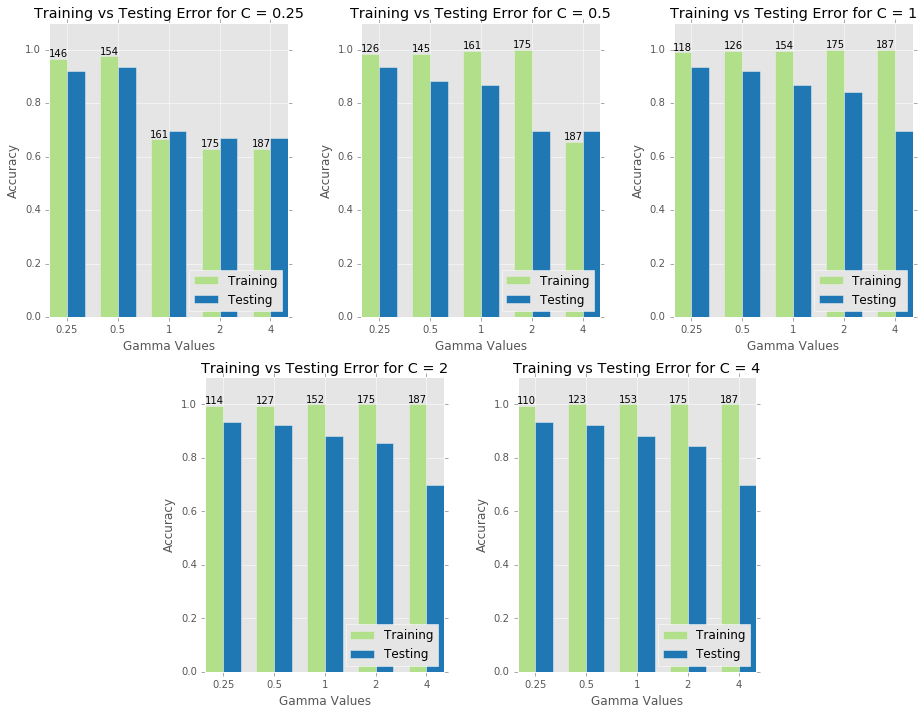

In [171]:
fig = plt.figure(figsize=(13, 10))
gs = gridspec.GridSpec(2, 6)
plt.style.use('ggplot')
ind = np.arange(5)
width = 0.35

plot_c_gamma_graph(ax1,0,0,2, c_train_acc[0],c_test_acc[0],c_sup_vec[0],C=C_vals[0])
plot_c_gamma_graph(ax1,0,2,4, c_train_acc[1],c_test_acc[1],c_sup_vec[1],C=C_vals[1])
plot_c_gamma_graph(ax1,0,4,6, c_train_acc[2],c_test_acc[2],c_sup_vec[2],C=C_vals[2])

plot_c_gamma_graph(ax1,1,1,3, c_train_acc[3],c_test_acc[3],c_sup_vec[3],C=C_vals[3])
plot_c_gamma_graph(ax1,1,3,5, c_train_acc[4],c_test_acc[4],c_sup_vec[4],C=C_vals[4])

fig.tight_layout()

plt.show()